# Predicting country location based on flag properties



In this exercise, I train classifiers to predict the landmass on which a country is located based on the properties of its flag. I compare the performance of Decision Tree, Random Forest, SVM, and KNN classifiers. The data were taken from the UCI Machine Learning Repository, located here: https://archive.ics.uci.edu/ml/datasets/flags

First, make sure to have all the necessary dependencies:

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Explore the data

Now we read the data in and check out the columns. What kind of information is recorded?

In [4]:
flags = pd.read_csv('flags.csv',header= 0)
print(flags.columns)

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')


We see some columns that might be helpful identifying where its parent country is located. As a hypothesis, I adopt features related to colors as perhaps being useful for classification. `Colors` stores the number of different colors appearing on a flag. Each named color column, `Red`, `Green`, etc stores a binary value, 1 if the color is present, 0 otherwise. `Mainhue` stores the dominant color present in the flag. We will use these features to predict the `Landmass`, which is the continent where the country is found. There are six values, encoded as follows: 1 = N.America, 2 = S.America, 3 = Europe, 4 = Africa, 5 = Asia, 6 = Oceania

In [5]:
print(flags["Landmass"].value_counts())

4    52
5    39
3    35
1    31
6    20
2    17
Name: Landmass, dtype: int64


We note a couple things about the data. The value we are classifying on is imbalanced, with a range of observations from 52 African countries down to 17 South American countries at the lowest. There is also not much data to work with - we are constrained by the number of countries on the earth, and so our models may suffer from a lack of training data. 

### Prepare the data

To get the data into a form we can work with, a few changes are required. `Mainhue` is a categorical variable, so we will use dummy/one-hot encoding to coerce it into a useable form: 

In [6]:
flags = pd.get_dummies(flags, columns = ['Mainhue'])

Next, separate the data into labels and training features, and prepare training and test data:

In [8]:
labels = flags[["Landmass"]]
data = flags[["Red", "Green", "Blue", "Colors", "Gold", "White", "Black", "Orange", "Mainhue_black", "Mainhue_brown", 
              "Mainhue_blue", "Mainhue_gold", "Mainhue_green", "Mainhue_orange", "Mainhue_red", "Mainhue_white" ]]

train_data, test_data, train_labels, test_labels = train_test_split(data,labels,test_size=0.2,random_state = 1)


### Modeling with colors

Let's see how our models are able to handle the somewhat impoverished data, starting with the Decision Tree classifier. We'll examine a range of depths and find the most effective one.

In [10]:
scores = []

for i in range(1,21):
  tree = DecisionTreeClassifier(random_state = 1,max_depth=i)
  tree.fit(train_data,train_labels)
  scores.append(tree.score(test_data,test_labels))

best_score = max(scores)
print("Tree: Depth with best score is " + str(scores.index(best_score) + 1) + " with predictive power of " + str(best_score))


Tree: Depth with best score is 8 with predictive power of 0.4358974358974359


It performs better than chance - with 6 landmass categories, randomly guessing would achieve about a 17% success rate. However, it's definitely not near a level where you would be confident in its classifications. Let's take a look at some other models, their predictive power, and the resulting confusion matrices. Note that as the predicted variable is multiclass, I build the confusion matrices from scratch to make them easier to interpret:

Tree: 0.4358974358974359


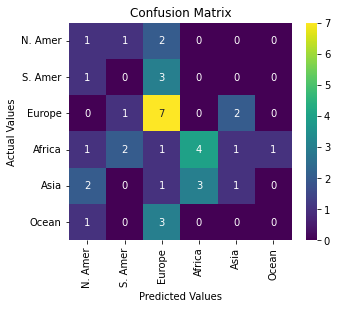

Forest: 0.38461538461538464


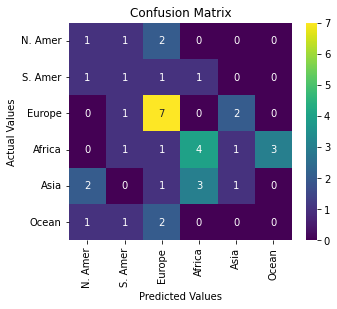


SVM: 0.2564102564102564


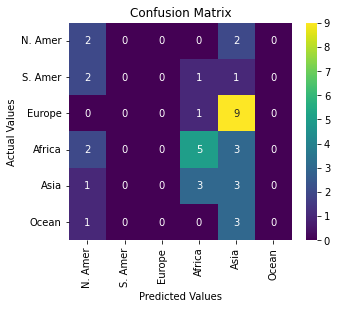

KNN: 0.4358974358974359


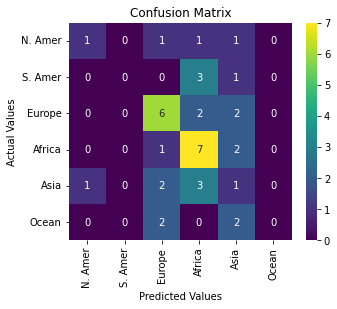

In [31]:
#Decision Tree
scores = []
for i in range(1,21):
  tree = DecisionTreeClassifier(random_state = 1,max_depth=i)
  tree.fit(train_data,train_labels)
  scores.append(tree.score(test_data,test_labels))
best_score = max(scores)
print("Tree: " + str(best_score))
y_pred = tree.predict(test_data)
cm_tree = confusion_matrix(test_labels, y_pred)
cm_tree_df = pd.DataFrame(cm_tree,
                     index = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'], 
                     columns = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_tree_df, annot=True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#Random Forest
scores_for = []
for i in range(1,21):
  model = RandomForestClassifier(n_estimators=200, random_state = 1,max_depth=i)
  model.fit(train_data,np.ravel(train_labels))
  scores_for.append(model.score(test_data,test_labels))
best_score_for = max(scores_for)
print("Forest: " + str(best_score_for))
y_pred_for = model.predict(test_data)
cm_for = confusion_matrix(test_labels, y_pred_for)
cm_for_df = pd.DataFrame(cm_for,
                     index = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'], 
                     columns = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_for_df, annot=True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#SVM
svm = SVC(kernel='rbf')
svm.fit(train_data,np.ravel(train_labels))
print("\nSVM: " + str(svm.score(test_data, test_labels)))
y_pred_svm = svm.predict(test_data)
cm_svm = confusion_matrix(test_labels, y_pred_svm)
cm_svm_df = pd.DataFrame(cm_svm,
                     index = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'], 
                     columns = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm_df, annot=True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#KNN
scores_knn = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors = i, p = 2)
    train_data,test_data,train_labels,test_labels = train_test_split(data,labels,test_size=0.2,random_state = 1)
    knn.fit(train_data,np.ravel(train_labels))
    scores_knn.append(knn.score(test_data,test_labels))
best_score_knn = max(scores_knn)
print("KNN: " + str(best_score_knn))
y_pred_knn = knn.predict(test_data)
cm_knn = confusion_matrix(test_labels, y_pred_knn)
cm_knn_df = pd.DataFrame(cm_knn,
                     index = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'], 
                     columns = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn_df, annot=True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()




As predicted, the models appear to struggle from a lack of data/imbalance of data. For regions with more countries, such as Africa and Europe, classification is more effective that for regions with fewer countries, such as Oceania. It's possible that addition of other features could improve the performance of the models. Maybe color isn't the best hypothesis - maybe something about the shapes on the flags would be more informative. Let's test that hypothesis as well, adjusting our features as follows:

### Modeling with shapes

In [32]:
data = flags[['Bars', 'Stripes', 'Circles', 'Crosses', 'Saltires', 'Quarters', 'Sunstars', 'Crescent', 
             'Triangle', 'Icon', 'Animate', 'Text']]

train_data, test_data, train_labels, test_labels = train_test_split(data,labels,test_size=0.2,random_state = 1)

Checking the performance of the various models on shapes:

Tree: 0.38461538461538464


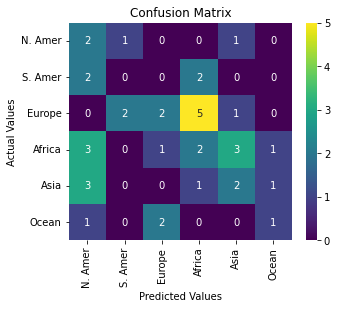

Forest: 0.41025641025641024


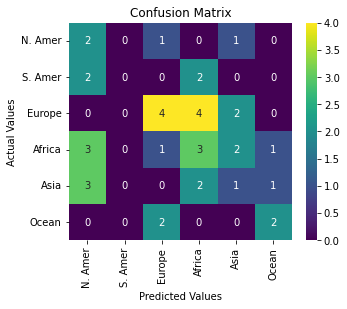


SVM: 0.3076923076923077


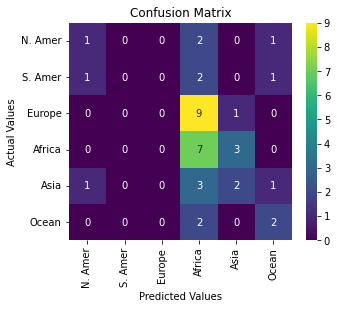

KNN: 0.38461538461538464


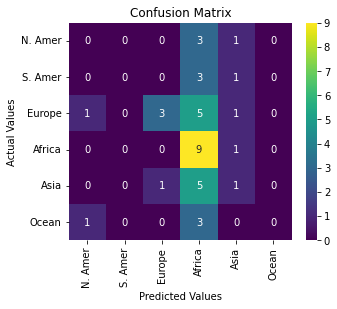

In [33]:
#Decision Tree
scores = []
for i in range(1,21):
  tree = DecisionTreeClassifier(random_state = 1,max_depth=i)
  tree.fit(train_data,train_labels)
  scores.append(tree.score(test_data,test_labels))
best_score = max(scores)
print("Tree: " + str(best_score))
y_pred = tree.predict(test_data)
cm_tree = confusion_matrix(test_labels, y_pred)
cm_tree_df = pd.DataFrame(cm_tree,
                     index = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'], 
                     columns = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_tree_df, annot=True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#Random Forest
scores_for = []
for i in range(1,21):
  model = RandomForestClassifier(n_estimators=200, random_state = 1,max_depth=i)
  model.fit(train_data,np.ravel(train_labels))
  scores_for.append(model.score(test_data,test_labels))
best_score_for = max(scores_for)
print("Forest: " + str(best_score_for))
y_pred_for = model.predict(test_data)
cm_for = confusion_matrix(test_labels, y_pred_for)
cm_for_df = pd.DataFrame(cm_for,
                     index = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'], 
                     columns = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_for_df, annot=True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#SVM
svm = SVC(kernel='rbf')
svm.fit(train_data,np.ravel(train_labels))
print("\nSVM: " + str(svm.score(test_data, test_labels)))
y_pred_svm = svm.predict(test_data)
cm_svm = confusion_matrix(test_labels, y_pred_svm)
cm_svm_df = pd.DataFrame(cm_svm,
                     index = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'], 
                     columns = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm_df, annot=True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#KNN
scores_knn = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors = i, p = 2)
    train_data,test_data,train_labels,test_labels = train_test_split(data,labels,test_size=0.2,random_state = 1)
    knn.fit(train_data,np.ravel(train_labels))
    scores_knn.append(knn.score(test_data,test_labels))
best_score_knn = max(scores_knn)
print("KNN: " + str(best_score_knn))
y_pred_knn = knn.predict(test_data)
cm_knn = confusion_matrix(test_labels, y_pred_knn)
cm_knn_df = pd.DataFrame(cm_knn,
                     index = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'], 
                     columns = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn_df, annot=True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()



Some of the models improve slightly, some decline in their predictions slightly. The same present with the models based on color properties remain however. As a final exercise, let's test out the models using both color and shape information. 



### Modeling with both

In [34]:
data = flags[['Bars', 'Stripes', 'Circles', 'Crosses', 'Saltires', 'Quarters', 'Sunstars', 'Crescent', 
             'Triangle', 'Icon', 'Animate', 'Text', "Red", "Green", "Blue", "Colors", "Gold", "White", "Black", "Orange", "Mainhue_black", "Mainhue_brown", 
              "Mainhue_blue", "Mainhue_gold", "Mainhue_green", "Mainhue_orange", "Mainhue_red", "Mainhue_white" ]]

train_data, test_data, train_labels, test_labels = train_test_split(data,labels,test_size=0.2,random_state = 1)

Tree: 0.5384615384615384


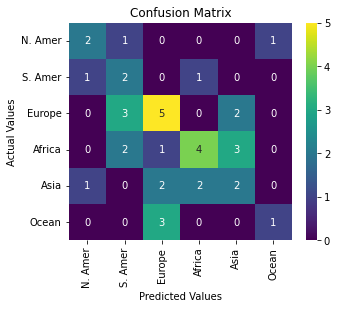

Forest: 0.5641025641025641


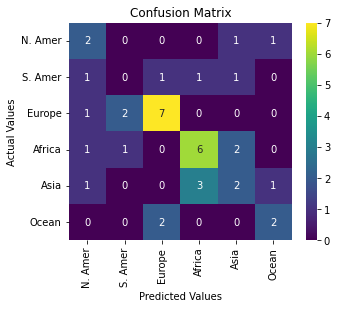


SVM: 0.3333333333333333


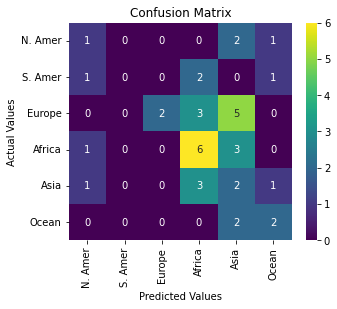

KNN: 0.46153846153846156


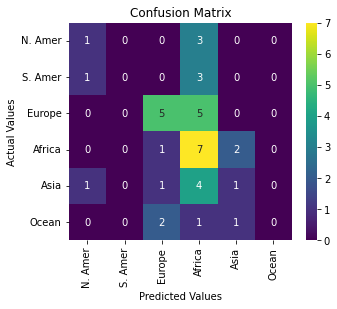

In [35]:
#Decision Tree
scores = []
for i in range(1,21):
  tree = DecisionTreeClassifier(random_state = 1,max_depth=i)
  tree.fit(train_data,train_labels)
  scores.append(tree.score(test_data,test_labels))
best_score = max(scores)
print("Tree: " + str(best_score))
y_pred = tree.predict(test_data)
cm_tree = confusion_matrix(test_labels, y_pred)
cm_tree_df = pd.DataFrame(cm_tree,
                     index = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'], 
                     columns = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_tree_df, annot=True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#Random Forest
scores_for = []
for i in range(1,21):
  model = RandomForestClassifier(n_estimators=200, random_state = 1,max_depth=i)
  model.fit(train_data,np.ravel(train_labels))
  scores_for.append(model.score(test_data,test_labels))
best_score_for = max(scores_for)
print("Forest: " + str(best_score_for))
y_pred_for = model.predict(test_data)
cm_for = confusion_matrix(test_labels, y_pred_for)
cm_for_df = pd.DataFrame(cm_for,
                     index = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'], 
                     columns = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_for_df, annot=True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#SVM
svm = SVC(kernel='rbf')
svm.fit(train_data,np.ravel(train_labels))
print("\nSVM: " + str(svm.score(test_data, test_labels)))
y_pred_svm = svm.predict(test_data)
cm_svm = confusion_matrix(test_labels, y_pred_svm)
cm_svm_df = pd.DataFrame(cm_svm,
                     index = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'], 
                     columns = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm_df, annot=True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#KNN
scores_knn = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors = i, p = 2)
    train_data,test_data,train_labels,test_labels = train_test_split(data,labels,test_size=0.2,random_state = 1)
    knn.fit(train_data,np.ravel(train_labels))
    scores_knn.append(knn.score(test_data,test_labels))
best_score_knn = max(scores_knn)
print("KNN: " + str(best_score_knn))
y_pred_knn = knn.predict(test_data)
cm_knn = confusion_matrix(test_labels, y_pred_knn)
cm_knn_df = pd.DataFrame(cm_knn,
                     index = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'], 
                     columns = ['N. Amer','S. Amer','Europe', 'Africa', 'Asia', 'Ocean'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn_df, annot=True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


It definitely boosts the performance, but there's still a lot of room for improvement. Ultimately, it is likely that there is just not enough data to effectively train the models. 

<img src="flags.png" width="400" style = "padding: 0px 10px 10px 0px;">  

